In [2]:
import pandas as pd
import seaborn as sns
df= pd. read_csv ("E:\project\Data science\Github\AQI\city_day.csv")
df.head()

City        Date  PM2.5  PM10  NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN NaN  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN NaN  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN NaN  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN NaN  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN NaN  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN

In [3]:
df['Date']=pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df.head()

City       Date  PM2.5  PM10  NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad 2015-01-01    NaN   NaN NaN  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad 2015-01-02    NaN   NaN NaN  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad 2015-01-03    NaN   NaN NaN  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad 2015-01-04    NaN   NaN NaN  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad 2015-01-05    NaN   NaN NaN  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  year  
0  133.36     0.00     0.02    0.00  NaN        NaN  2015  
1   34.06     3.68     5.50    3.77  NaN        NaN  2015  
2   30.70     6.80    16.40    2.25  NaN        NaN  2015  
3   36.08     4.43    10.14    1.00  NaN        NaN  2015  
4   39.31     7.01    18.89    2.78  NaN        NaN  2015

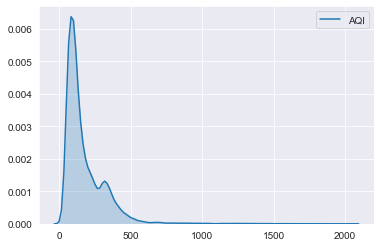

In [4]:
sns.set_style('darkgrid')
sns.kdeplot(data=df['AQI'],label="AQI",shade=True)

## Lowest AQI of city

In [5]:
import matplotlib.pyplot as plt
aqi=df.groupby('City')['AQI'].min().reset_index()
aqi=aqi.sort_values("AQI")
aqi

City   AQI
20             Talcher  13.0
19            Shillong  14.0
3             Amritsar  20.0
4            Bengaluru  20.0
6         Brajrajnagar  22.0
12           Hyderabad  22.0
2            Amaravati  24.0
11            Guwahati  25.0
7           Chandigarh  26.0
15             Kolkata  26.0
14          Jorapokhar  27.0
9                Delhi  29.0
8              Chennai  30.0
21  Thiruvananthapuram  36.0
5               Bhopal  37.0
10            Gurugram  38.0
16             Lucknow  39.0
17              Mumbai  40.0
1               Aizawl  40.0
13              Jaipur  43.0
0            Ahmedabad  48.0
18               Patna  60.0

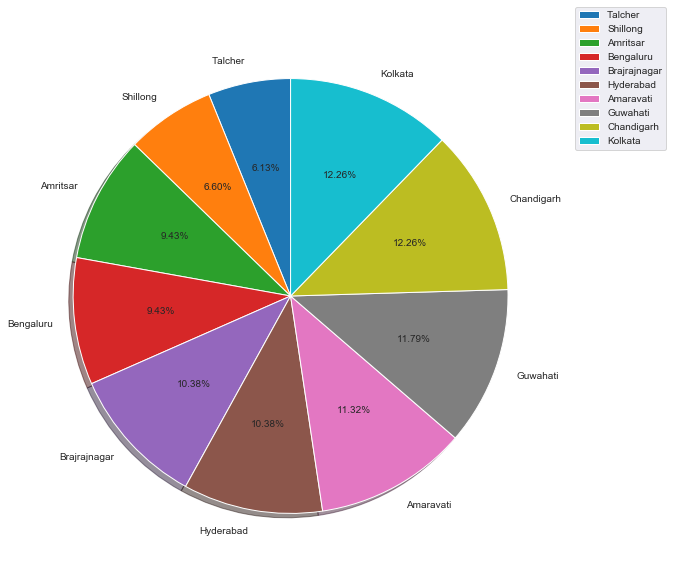

In [6]:
aqi=aqi.head(10)
fig1,ax1=plt.subplots(figsize=(15,10))
ax1.pie(aqi["AQI"].tolist(),labels=aqi['City'].tolist(),autopct="%1.2f%%",shadow=True,startangle=90)
plt.legend(loc='right',bbox_to_anchor=(1.2,0.9))
plt.show()

In [11]:
import plotly.express as px
perc = df.loc[:, ["year", "City","AQI"]]
perc['mean_AQI']=perc.groupby([perc.City, perc.year])["AQI"].transform('mean')
perc.drop('AQI', axis=1, inplace=True)
perc = perc.drop_duplicates()
perc = perc.sort_values('year', ascending=False)
top = ['Talcher', 'Amritsar', 'Brajrajnagar','Amaravati']
perc = perc.loc[perc['City'].isin(top)]
perc = perc.sort_values("year")
perc = perc.fillna(100)
fig = px.bar(perc, x='City', y='mean_AQI', animation_frame="year", animation_group="City", color="City",
            hover_name="City")
fig.show()

## Highest AQI City

In [12]:
aqi2=df.groupby('City')['AQI'].max().reset_index()
aqi2=aqi2.sort_values("AQI")
aqi2.tail(10)

City     AQI
20     Talcher   570.0
14  Jorapokhar   604.0
18       Patna   619.0
16     Lucknow   707.0
9        Delhi   716.0
12   Hyderabad   737.0
3     Amritsar   869.0
10    Gurugram   891.0
11    Guwahati   956.0
0    Ahmedabad  2049.0

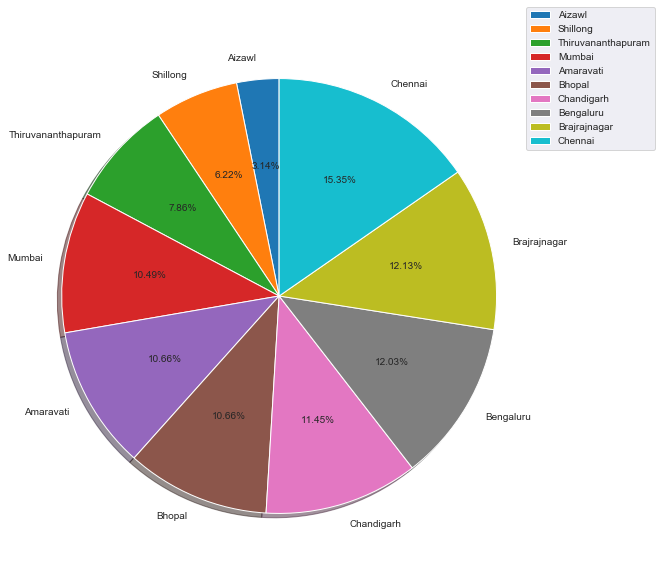

In [13]:
aqi2=aqi2.head(10)
fig1,ax1=plt.subplots(figsize=(15,10))
ax1.pie(aqi2["AQI"].tolist(),labels=aqi2['City'].tolist(),autopct="%1.2f%%",shadow=True,startangle=90)
plt.legend(loc='right',bbox_to_anchor=(1.2,0.9))
plt.show()

In [14]:
perc = df.loc[:, ["year", "City","AQI"]]
perc['mean_AQI']=perc.groupby([perc.City, perc.year])["AQI"].transform('mean')
perc.drop('AQI', axis=1, inplace=True)
perc = perc.drop_duplicates()
perc = perc.sort_values('year', ascending=False)
top2 = ['Hyderabad', 'Amritsar', 'Gurugram', 'Guwahati','Ahmedabad']
perc = perc.loc[perc['City'].isin(top2)]
perc = perc.sort_values("year")
perc = perc.fillna(100)
fig = px.bar(perc, x='City', y='mean_AQI', animation_frame="year", animation_group="City", color="City",
            hover_name="City")
fig.show()

In [15]:
df.head()

City       Date  PM2.5  PM10  NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad 2015-01-01    NaN   NaN NaN  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad 2015-01-02    NaN   NaN NaN  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad 2015-01-03    NaN   NaN NaN  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad 2015-01-04    NaN   NaN NaN  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad 2015-01-05    NaN   NaN NaN  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  year  
0  133.36     0.00     0.02    0.00  NaN        NaN  2015  
1   34.06     3.68     5.50    3.77  NaN        NaN  2015  
2   30.70     6.80    16.40    2.25  NaN        NaN  2015  
3   36.08     4.43    10.14    1.00  NaN        NaN  2015  
4   39.31     7.01    18.89    2.78  NaN        NaN  2015

In [16]:
data1 = df['AQI'].dropna()
top_10_city = df.loc[data1.index].groupby('City')['AQI'].mean().reset_index()
top_10_city.sort_values('AQI', ascending=False, inplace=True)
top_10_city.head(10)

City         AQI
0      Ahmedabad  473.912281
9          Delhi  262.255086
18         Patna  248.270153
10      Gurugram  230.518600
16       Lucknow  222.881833
20       Talcher  179.990506
14    Jorapokhar  162.746009
11      Guwahati  156.486683
15       Kolkata  151.535714
6   Brajrajnagar  151.519345

In [17]:
top_cities = top_10_city.head(10)['City'].tolist()
top_cities

['Ahmedabad',
 'Delhi',
 'Patna',
 'Gurugram',
 'Lucknow',
 'Talcher',
 'Jorapokhar',
 'Guwahati',
 'Kolkata',
 'Brajrajnagar']

Talcher city - year wise mean of AQI

In [18]:
talcher = df[df['City'] == "Talcher"]
data_by_year = talcher.groupby('year')['AQI'].mean().reset_index().dropna()
data_by_year.head()

year         AQI
1  2018  185.744770
2  2019  169.023102
3  2020  201.633333

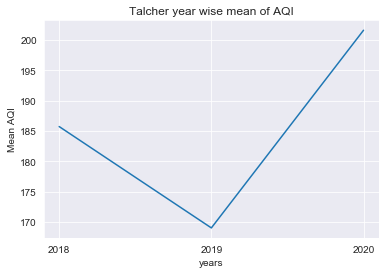

In [19]:
plt.plot(data_by_year['year'], data_by_year['AQI'])
plt.xticks(data_by_year['year'].tolist())
plt.title('Talcher year wise mean of AQI')
plt.xlabel("years")
plt.ylabel("Mean AQI")
plt.show()

## Bajrajnagar AQI map

In [20]:
braj = df[df['City'] == "Brajrajnagar"]
data_by_year = braj.groupby('year')['AQI'].mean().reset_index().dropna()
data_by_year.head()

year         AQI
0  2017  247.600000
1  2018  154.996154
2  2019  148.400621
3  2020  140.762500

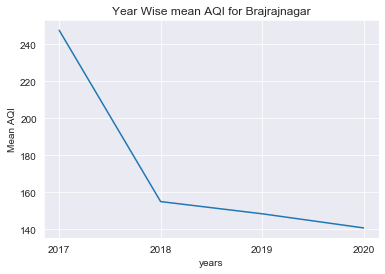

In [21]:
plt.plot(data_by_year['year'], data_by_year['AQI'])
plt.xticks(data_by_year['year'].tolist())
plt.title('Year Wise mean AQI for Brajrajnagar')
plt.xlabel("years")
plt.ylabel("Mean AQI")
plt.show()

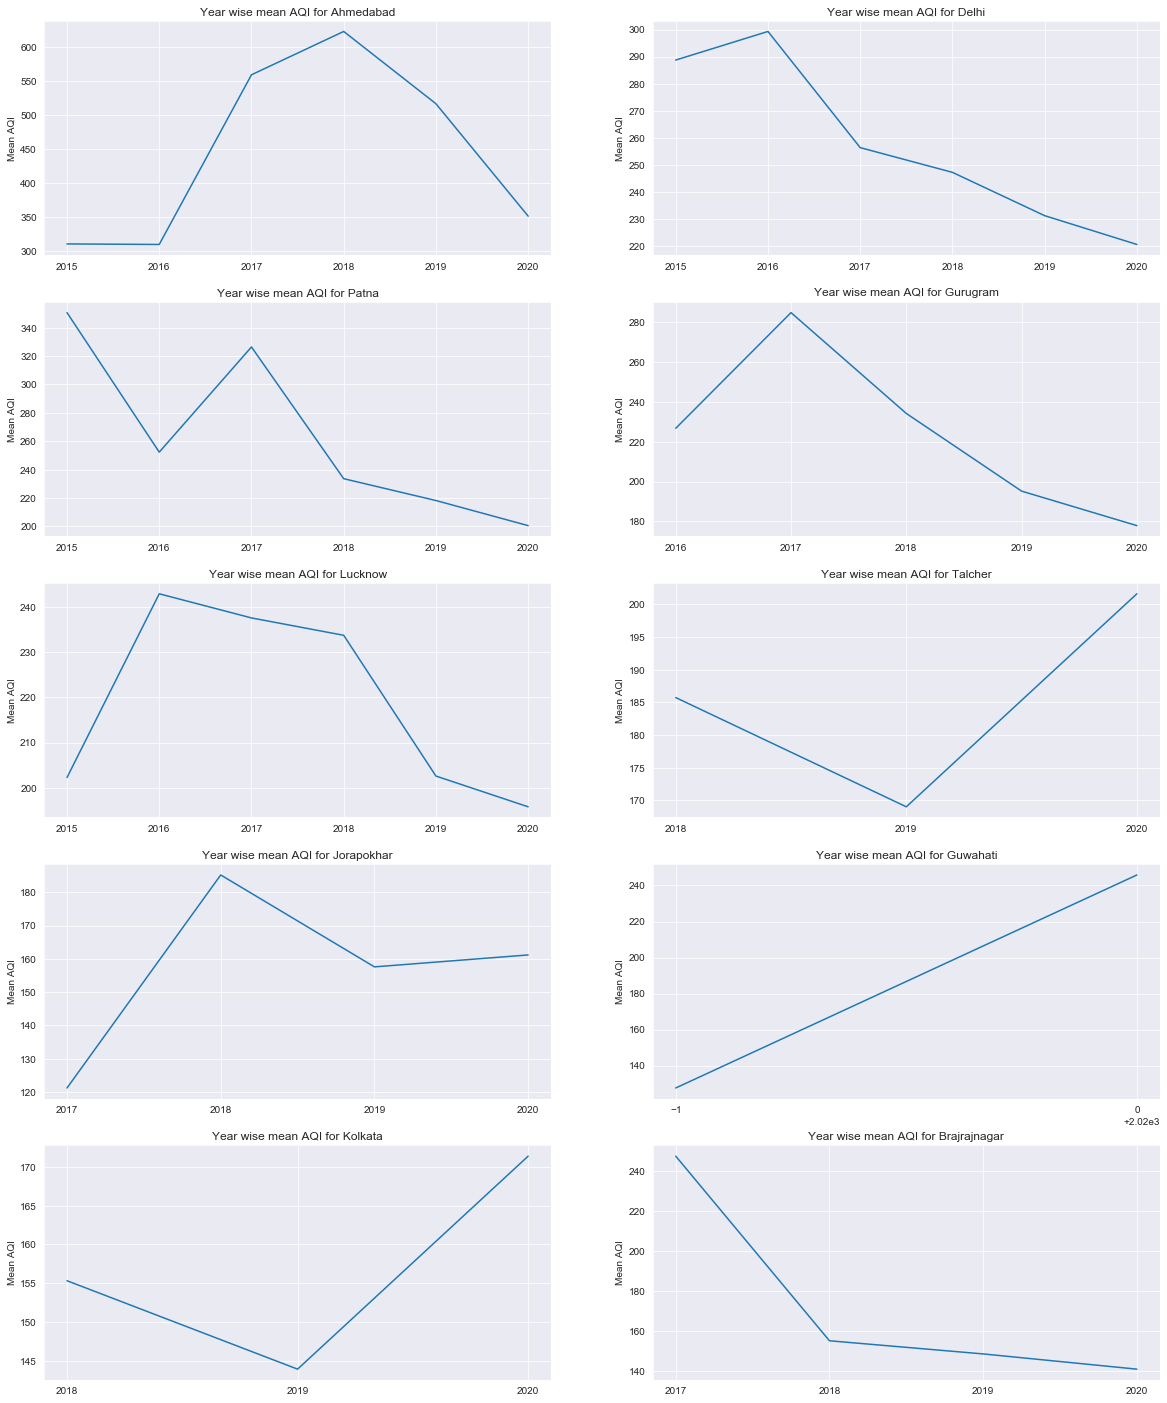

In [22]:
fig = plt.figure(figsize=(20,25))
for city, num in zip(top_cities, range(1,11)):
    df2 = df[df["City"]==city]
    data_by_year = df2.groupby('year')['AQI'].mean().reset_index().dropna()
    ax = fig.add_subplot(5,2,num)
    ax.plot(data_by_year['year'],data_by_year['AQI'])
    ax.set_xticks(data_by_year['year'].tolist())
    ax.set_title("Year wise mean AQI for {}".format(city))
    ax.set_ylabel('Mean AQI')

## Plotting lineplot of all cities year wise

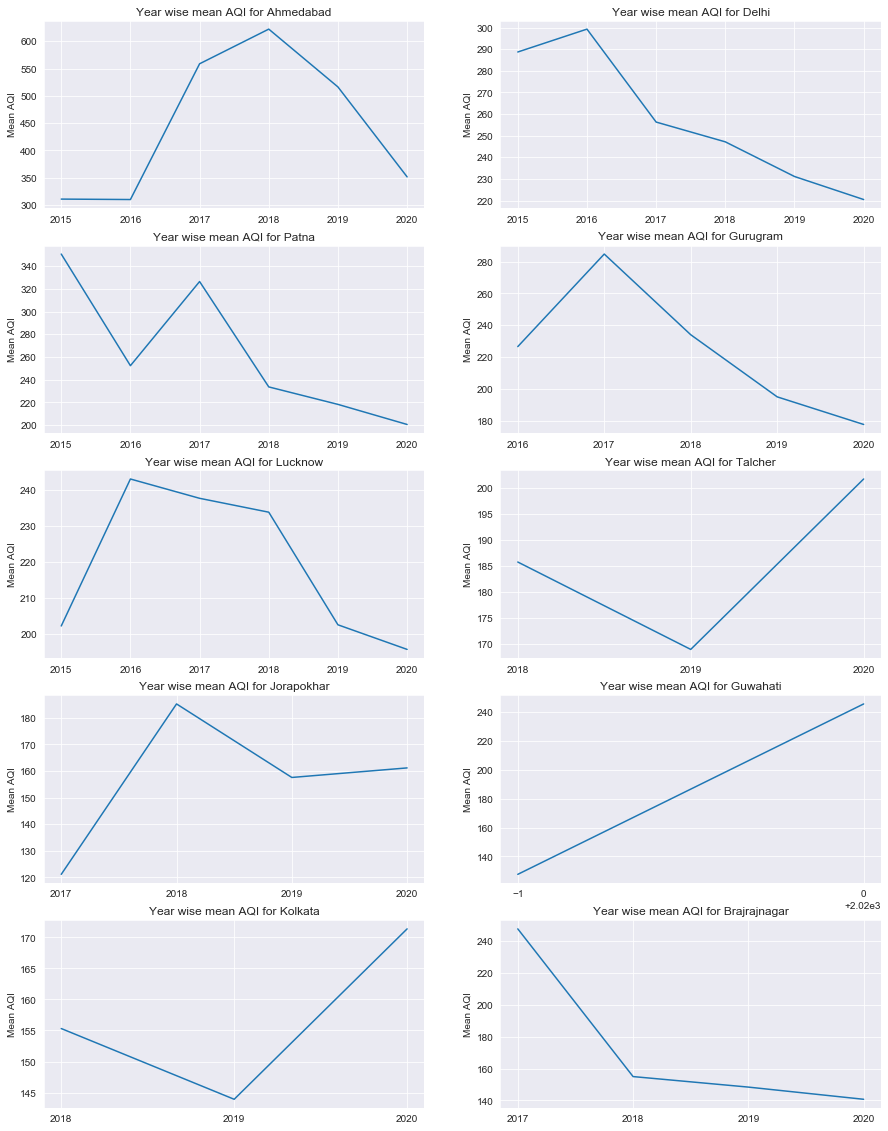

In [23]:
fig = plt.figure(figsize=(15,20))
for city, num in zip(top_cities, range(1,11)):
    df2 = df[df["City"]==city]
    data_by_year = df2.groupby('year')['AQI'].mean().reset_index().dropna()
    ax = fig.add_subplot(5,2,num)
    ax.plot(data_by_year['year'],data_by_year['AQI'])
    ax.set_xticks(data_by_year['year'].tolist())
    ax.set_title("Year wise mean AQI for {}".format(city))
    ax.set_ylabel('Mean AQI')

# NO

### City having Highest NO

In [24]:
df3 = df.fillna(0)

In [25]:
no = df3.groupby('City')['NO'].mean().reset_index()
no = no.sort_values("NO")

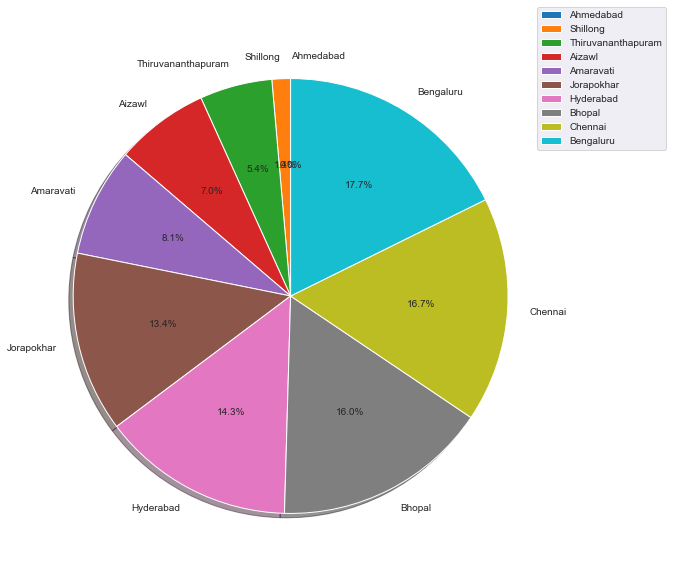

In [28]:
no=no.head(10)
fig1, ax1 = plt.subplots(figsize=(15,10))
ax1.pie(no['NO'].tolist(), labels=no['City'].tolist(), autopct='%1.1f%%', shadow=True, startangle=90)
plt.legend(loc='right', bbox_to_anchor=(1.2,0.9))
plt.show()

In [47]:
perc = df3.loc[:, ["year", "City","NO"]]
perc['mean_NO']=perc.groupby([perc.City, perc.year])["NO"].transform('mean')
perc.drop('NO', axis=1, inplace=True)
perc = perc.drop_duplicates()
perc = perc.sort_values('year', ascending=False)
loop = ['Hyderabad', 'Chennai', 'Bengaluru']
itr = iter(loop)
top2 = list(itr)
perc = perc.loc[perc['City'].isin(top2)]
perc = perc.sort_values("year")
perc = perc.fillna(100)
fig = px.bar(perc, x='City', y='mean_NO', animation_frame="year", animation_group="City", color="City",
            hover_name="City")
fig.show()

## Distribution of NO, NO2 and Others

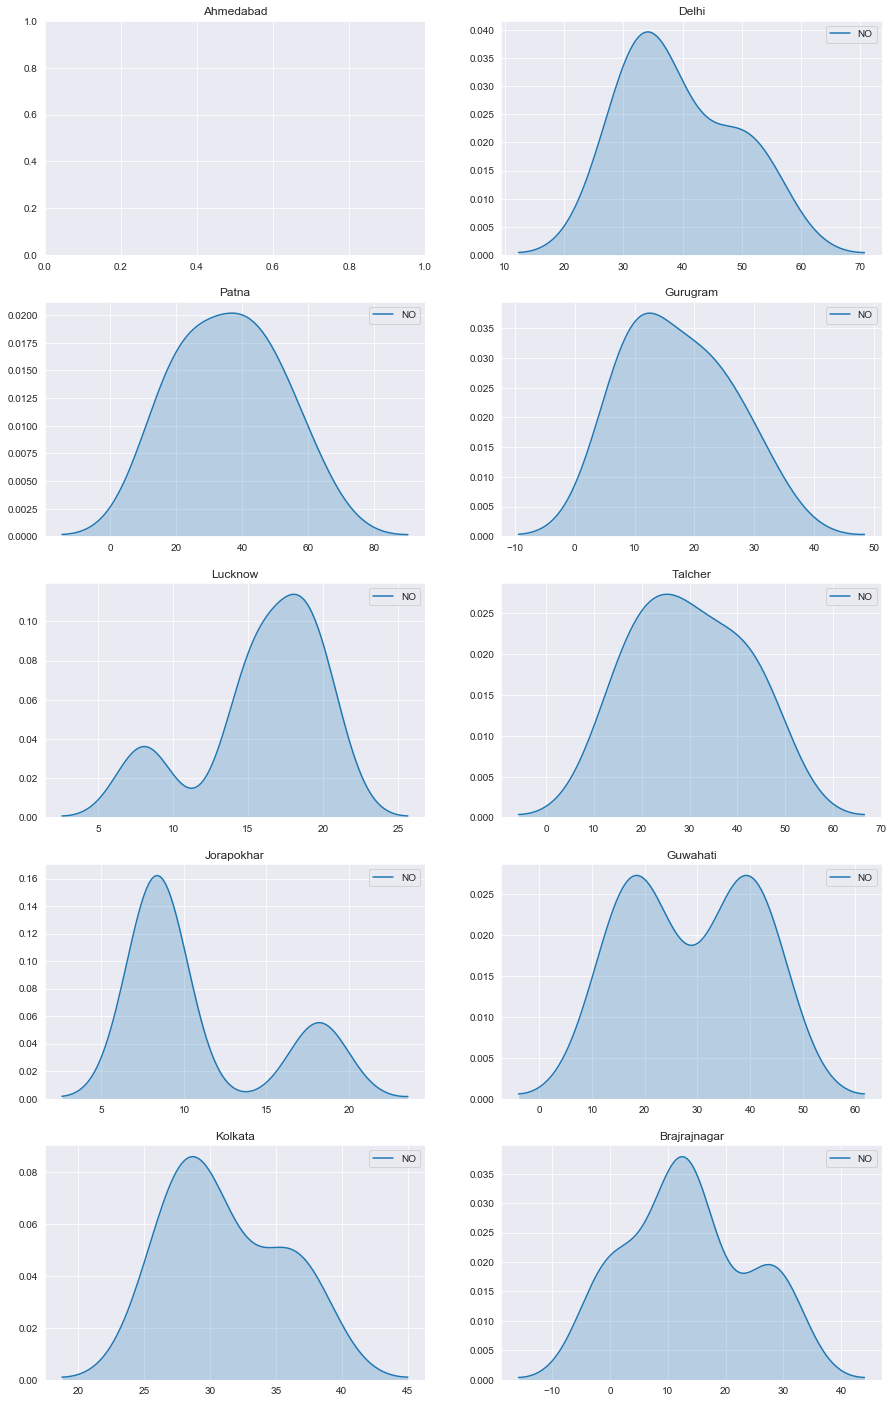

In [49]:
fig = plt.figure(figsize=(15,25))
for city, num in zip(top_cities, range(1,11)):
    df4 = df[df['City']==city]
    df4 = df4.groupby('year')['NO'].mean().reset_index().dropna()
    ax = fig.add_subplot(5,2,num)
    ax.set_title(city)
    sns.kdeplot(data=df4['NO'], label="NO", shade=True)

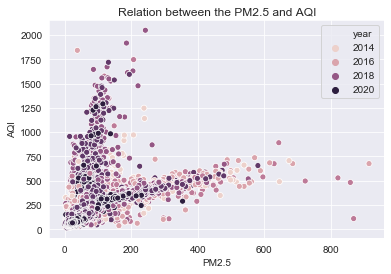

In [50]:
sns.scatterplot('PM2.5', 'AQI', hue='year', data=df)
plt.title("Relation between the PM2.5 and AQI")
plt.xlabel('PM2.5')
plt.ylabel('AQI')
plt.show()

In [51]:
df.head(2)

City       Date  PM2.5  PM10  NO    NO2    NOx  NH3    CO    SO2  \
0  Ahmedabad 2015-01-01    NaN   NaN NaN  18.22  17.15  NaN  0.92  27.64   
1  Ahmedabad 2015-01-02    NaN   NaN NaN  15.69  16.46  NaN  0.97  24.55   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  year  
0  133.36     0.00     0.02    0.00  NaN        NaN  2015  
1   34.06     3.68     5.50    3.77  NaN        NaN  2015

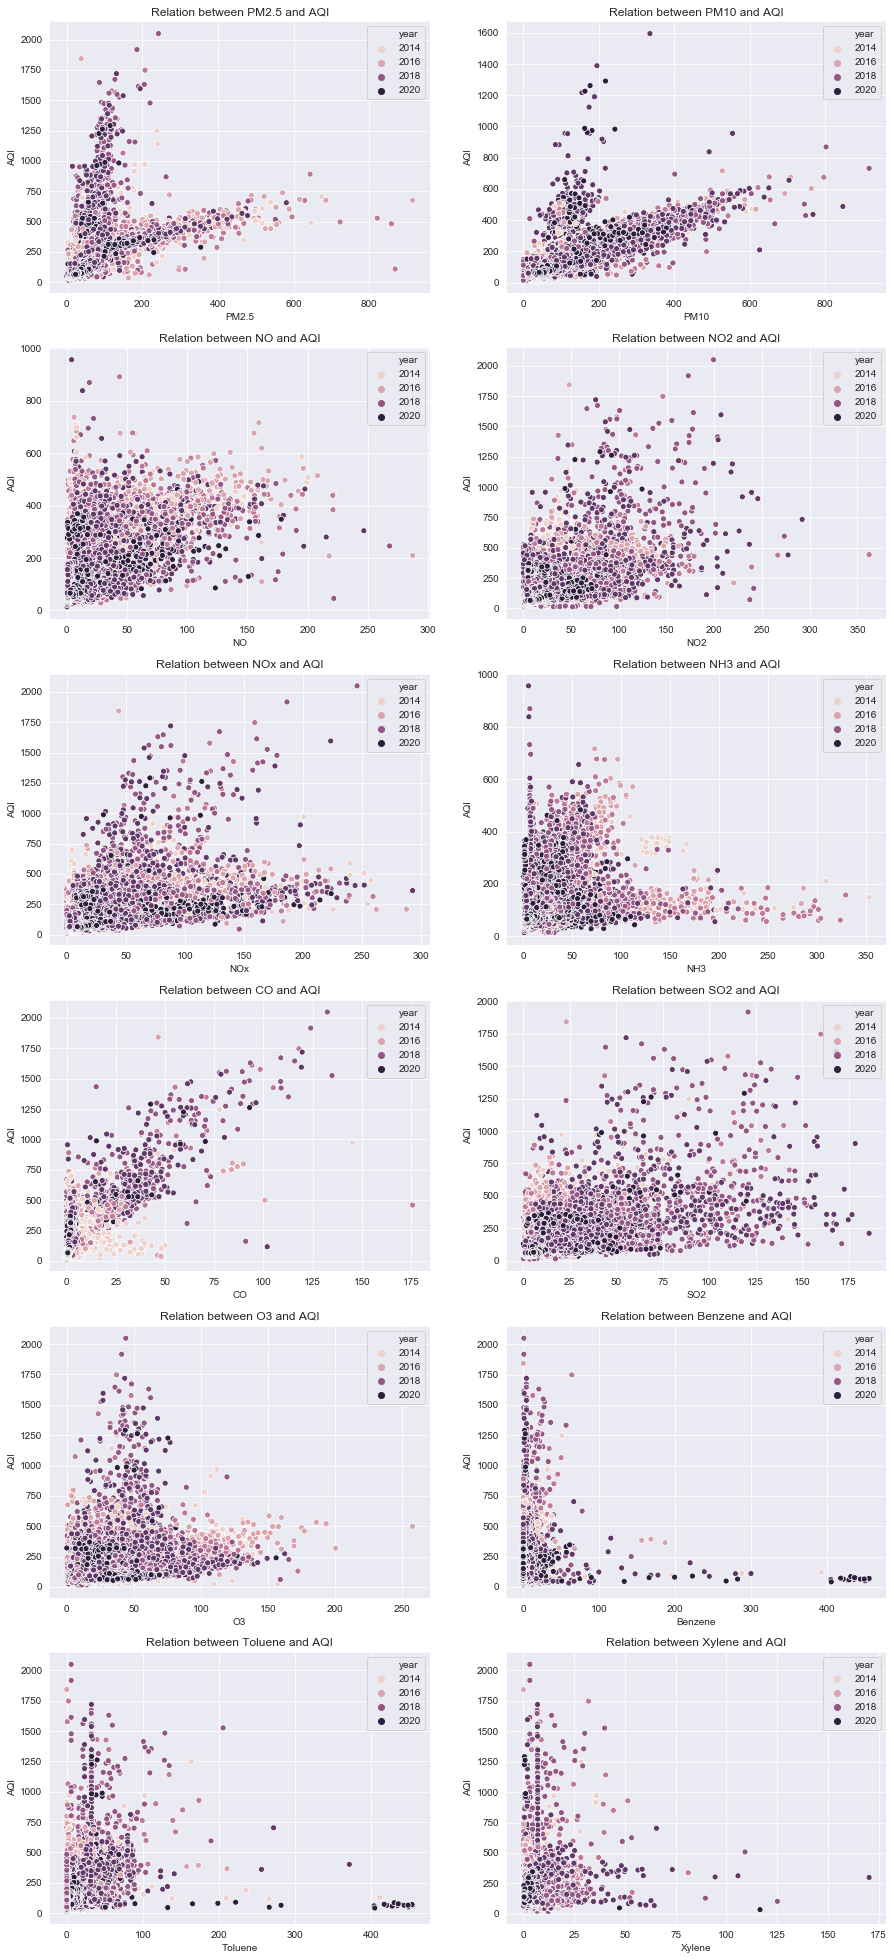

In [52]:
variables = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx',"NH3",'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
fig= plt.figure(figsize=(15,35))
for variable, num in zip(variables, range(1, len(variables) + 1)):
    ax = fig.add_subplot(6,2,num)
    sns.scatterplot(variable, 'AQI', hue='year', data=df)
    plt.title('Relation between {} and AQI'.format(variable))
    plt.xlabel(variable)
    plt.ylabel('AQI')

## Line chart of cities (AQI vs Date)

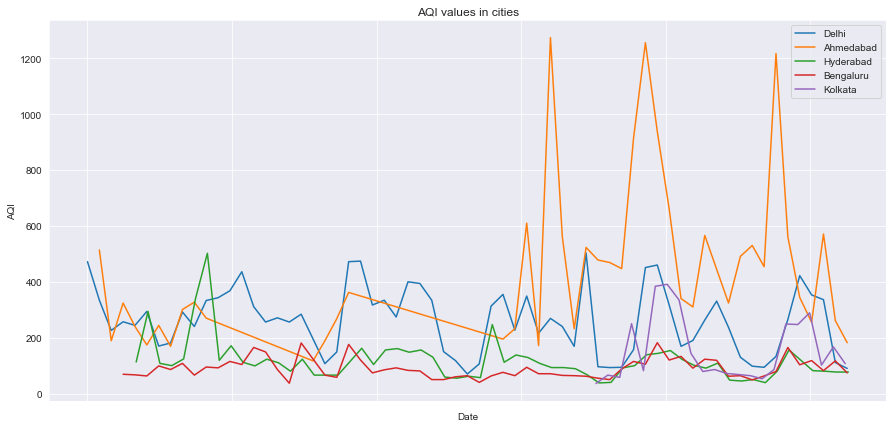

In [53]:
cities = ['Delhi', 'Ahmedabad', 'Hyderabad', 'Bengaluru', 'Kolkata']
fig, ax = plt.subplots(figsize=(15,7))

for city in cities:
    sns.lineplot(x="Date", y="AQI", data=df[df['City']==city].iloc[::30], label=city)

ax.set_xticklabels(ax.get_xticklabels(cities), rotation=45, ha='leaf')

ax.set_title('AQI values in cities')
ax.legend()